## i was going to create a logisitcal regression but ended up creating a decision tree

In [27]:
import pandas as pd
import re
import random
import os
import numpy as np

i need to create a dataset to train my logistical regression on

i want the following features:

- how many times appears the aliases

- proportion of alphanumeric char

- size of the text

- others ?

In [28]:
df = pd.read_parquet("data02.parquet")
df.map(lambda x: len(x))

,aliases,api.2000,api.2003,api.2006,api.2009,api.2012,api.2015,api.2018
companies,,,,,,,,
Banco Comercial Português,2,90,191,169,497,983,1219,824
Galp Energia,2,66,233,181,469,964,1104,812
EDP,3,80,245,140,538,1076,1528,872
Sonae,2,130,318,239,459,1109,1400,1026
Mota-Engil,2,3,67,26,164,384,596,445


let's use bcp, 2003 to start

In [29]:
aliases = df.iloc[0,0]
texts = [i["ExtractedText"] for i in df.iloc[0,1]]

my features

In [30]:
def count_alises(aliases, text):
    alias_count = {expression: 0 for expression in aliases}
    for alias in aliases:
        # Use re.escape to handle any special characters in the expression
        pattern = re.escape(alias.lower())
        matches = re.findall(pattern, text.lower())
        alias_count[alias] = len(matches)
    return sum(alias_count.values())

def proportion_alphanumeric(text):
    alphanumeric_chars = sum(char.isalnum() for char in text)
    proportion = alphanumeric_chars / len(text)
    return proportion

def count_dates(text):
    date_pattern = r'\b(\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{4}[-/]\d{1,2}[-/]\d{1,2})\b'
    # 10/11/2024', '10/10/2024', '12-25-1990', '2024-11-05', '01/10/2024'
    dates = re.findall(date_pattern, text)
    date_count = len(dates)
    return date_count

def count_CAPS(text):
    words = text.split()
    uppercase_word_count = sum(1 for word in words if word.isupper())
    return uppercase_word_count

def text_size(text):
    return len(text)

def Ist_ocurrence(text, aliases):
    indexs = []
    for alias in aliases:
        index = text.lower().find(alias.lower())
        if index != -1:
            indexs.append(index)
    return text[:min(indexs)].count(' ')

def count_HTTP(text):
    matches = re.findall("http", text.lower())
    return len(matches)

def count_time_occurrences(text):
    time_pattern = r'\b([01]?[0-9]|2[0-3]):[0-5][0-9]\b'   
    occurrences = re.findall(time_pattern, text)
    return len(occurrences)

lets start creating the dataset

In [31]:
def dataset_create(aliases, texts, out_name):
    dic = {"news": [], "countALI": [], "IstALIAS": [], "propAN": [], "countDTS": [], "txtSZ": [], "countCAPS": [], "txt": []}
    i = 0 
    #global a
    random.shuffle(texts)
    for text in texts:
        valid = int(input(text))
        #valid = int(a[i])
        print(valid, end = ", ")
        if valid not in [0,1,-1,2]:
            print("not 0 or 1")
        elif valid == -1:
            i += 1
            break
        elif valid == 2:
            i += 1
            continue
        elif valid in [0,1]:
            dic["news"].append(valid)
            dic["txt"].append(text)
            dic["IstALIAS"].append(Ist_ocurrence(text, aliases))
            dic["countALI"].append(count_alises(aliases, text))
            dic["propAN"].append(proportion_alphanumeric(text))
            dic["countDTS"].append(count_dates(text))
            dic["txtSZ"].append(text_size(text))
            dic["countCAPS"].append(count_CAPS(text))
            # "countHOUR" = count_time_occurrences(text)
            # "countHTTP" = count_HTTP(text)
            i += 1
    pd.DataFrame(dic).to_csv(out_name)
    print(f"\n{i}")

# (0,2) (1,2) (3,4) (2,6) (1,6) (1,7) (3,3) (1,3) (4,1) (0,1) (4,6) (3,1) (1,4) (3,7)
line, year = 3, 7
aliases = df.iloc[line,0]
texts = [i["ExtractedText"] for i in df.iloc[line,year]]

#dataset_create(aliases, texts, "logreg_sonae2018.csv")

ao fazer merge dos csv:

- criar coluna com o ano e depois separar em até 2008, depois de 2009 até 2014, depois de 2015 aka 7 em 7 anos

    - associar isto à prop de alfanumericos, por causa da publicidade ?

acresencar features:

- DONE ~~**titulo:** any alias in the first 50? char OU em q % de texto aparece o primeiro alias~~

- DONE **links:** quantidade de links externos, contar "http"

- DONE **horas:** quantidade de horas que aparecem "hh:mm"

- ~~**fonte:** nos primeiros 50? caracteres ou nos finais, ver se diz rtp, publico, dn , etc. - vai ser variavel categorica, hot encoding~~

    - associar esta binaria ao tamanho do texto com multiplicacao

    - atencao q pode ter mais q rtp, publico no mesmo, pode se escolher o primeiro q aparecer

    - caso nao tenha nenhum, chamar unknokn

    - associar ao titulo, pq titulos sao diferentes consoante jornais

ideia:

e se fizer treedecision em vez de logistical regression ? CUIDADO COM OVERFITTING

merge all csvs

In [32]:
"""
csvs = [(x, x[-8:-4]) for x in os.listdir() if x[:7] == "logreg_"]
dfs = []
for csv, year in csvs:
    df = pd.read_csv(csv, index_col=0)
    df["year"] = year
    dfs.append(df)
final_df = pd.concat(dfs, ignore_index=True)
"""
""

''

In [33]:
"""





final_df["countHOUR"] = final_df["txt"].map(lambda x: count_time_occurrences(x))
final_df["countHTTP"] = final_df["txt"].map(lambda x: count_HTTP(x))

final_df
"""
""

''

In [34]:
#final_df.to_csv("logreg.csv")

In [35]:
dataset = pd.read_csv("logreg.csv", index_col=0)
dataset

,news,countALI,propAN,countDTS,txtSZ,countCAPS,txt,IstALIAS,year,countHOUR,countHTTP
0,1,9,0.814786,0,5194,30,PSD exige envolvimento da população de Matosin...,12,2009,2,1
1,1,4,0.802270,0,3525,18,Revista de imprensa de Ambiente de 4 de Maio -...,211,2009,1,1
2,0,1,0.799427,1,3490,39,DN - Diário de Notícias Última hora Bahrein:...,213,2009,1,0
3,0,1,0.776351,1,5607,143,Clube dos Portugueses - Antena 3 TV RTP 1 21...,296,2009,16,0
4,0,9,0.791497,5,15194,229,"À Noite, As Notícias TV RTP 1 23:08 CRIMINAL...",262,2009,15,0
...,...,...,...,...,...,...,...,...,...,...,...
605,1,8,0.793415,17,1883,8,"rtp.pt 17/01/06 ENI continua com 33,34% da Gal...",7,2006,16,0
606,0,2,0.798363,25,5986,47,RTP RTPVídeo | Tempo | Infografismo | Trânsito...,866,2006,29,0
607,1,4,0.799881,0,5047,37,DN-Suplementos Negócios 23 de Julho de 2001 Au...,567,2000,0,0
608,0,2,0.794682,0,3234,34,DN 20 de Setembro de 2001 Telecomunicações l...,499,2000,0,0


---

convert year using hot encondig - bases on my observation creating the dataset and in the amount of news in each years group

- yearLow: 2000, 2003

- yearMed: 2006, 2009, 2012

- yearHig: 2015, 2018, 2020

In [36]:
dataset["yearLow"] = np.where(dataset["year"].isin([2000, 2003]), 1, 0)
dataset["yearMed"] = np.where(dataset["year"].isin([2006, 2009, 2012]), 1, 0)
dataset["yearHig"] = np.where(dataset["year"].isin([2015, 2018, 2020]), 1, 0)

#dataset.describe()
dataset.to_csv("DTreeData.csv")

Logistic Regression works well when there is a linear relationship between features and the target variable. If your features have such a relationship, logistic regression would be a good choice.

Decision Trees, on the other hand, do not require linear relationships and can handle non-linear interactions between features. If there are complex, non-linear interactions in your data, a Decision Tree would likely perform better.

**maybe** a decision tree might be better for me since the relationships might not be linear

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report#, confusion_matrix
import matplotlib.pyplot as plt

In [38]:
# features
X = dataset[['countALI', 'propAN', 'countDTS', 'txtSZ', 'countCAPS', 'IstALIAS', 'countHOUR', 'countHTTP', 'yearLow', 'yearMed', 'yearHig']]

# target
y = dataset['news'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=21)


In [39]:
# Define your parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=21)

# Set up GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-validation Score: 0.8860156833457804


In [43]:
clf = DecisionTreeClassifier(random_state=21, max_depth=3, min_samples_split=2, min_samples_leaf=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy after tuning: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


Accuracy after tuning: 0.9130434782608695
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        68
           1       0.90      0.75      0.82        24

    accuracy                           0.91        92
   macro avg       0.91      0.86      0.88        92
weighted avg       0.91      0.91      0.91        92



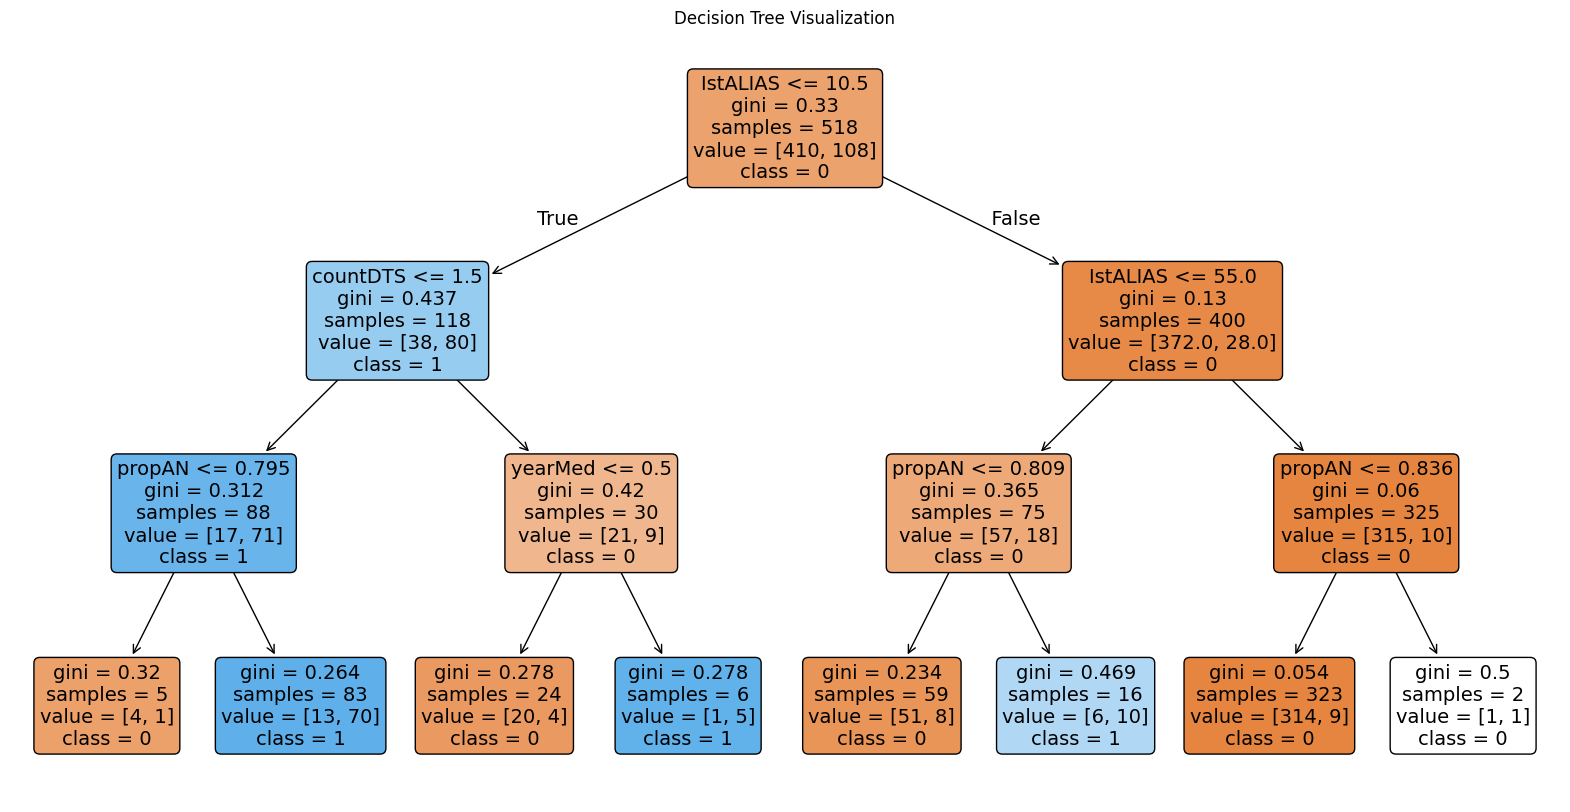

In [44]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True, fontsize=14)
plt.title('Decision Tree Visualization')
plt.show()


In [45]:
# Assuming clf is your fitted DecisionTreeClassifier
# and X_test is your test dataset
probabilities = clf.predict_proba(X_test)

# Create a DataFrame to hold the probabilities
prob_df = pd.DataFrame(probabilities, columns=['Probability of Class 0', 'Probability of Class 1'])
prob_df

,Probability of Class 0,Probability of Class 1
0,0.972136,0.027864
1,0.864407,0.135593
2,0.972136,0.027864
3,0.864407,0.135593
4,0.972136,0.027864
...,...,...
87,0.864407,0.135593
88,0.972136,0.027864
89,0.156627,0.843373
90,0.156627,0.843373
